In [1]:
import pandas as pd

files = [
    r"C:\Users\Qawse\Desktop\Кайрос\Туганова 2020 СПАРК_Выборка_компаний_20251015_1139.xlsx",
    r"C:\Users\Qawse\Desktop\Кайрос\Туганова 2021 СПАРК_Выборка_компаний_20251015_1138.xlsx",
    r"C:\Users\Qawse\Desktop\Кайрос\Туганова 2022 СПАРК_Выборка_компаний_20251015_1138.xlsx",
    r"C:\Users\Qawse\Desktop\Кайрос\Туганова 2023 СПАРК_Выборка_компаний_20251015_1137.xlsx",
    r"C:\Users\Qawse\Desktop\Кайрос\Туганова 2024 СПАРК_Выборка_компаний_20251015_1136.xlsx"
]

producers = {str(x) for x in [7728668928, 3604011804, 3604016432, 7725529877, 6165144855, 771617343, 7716241730, 5260431505, 7731218132, 3663134893, 7725838875, 7825124257, 1657221230, 5043032704, 7708296580, 7804484403, 7802539600, 7743908564, 7743934268, 7826148187, 7723560776, 6027167054, 7719074163, 3123334714, 1216005532, 9725003380, 1216030306, 3257017280, 5190075177, 7706036509, 6732179244, 6161087437, 5009003446, 3604019835, 3609003557, 7720832485, 7716716599, 5245003713, 7107527949, 6679011719, 7704302547, 6452117069, 6825008080, 9715330162, 6168094112, 2370009636, 1648046832, 6825007921, 5753006642, 7814543954, 5047209783, 7719547620, 7805778558, 5038123297, 7717731590, 7736659691, 4705065068, 9715298913, 7811568862, 4025454814, 5406974814, 6453155081, 5029226088, 7709681088, 6686111707, 6318020095, 5040098023, 7718313570, 3662995610, 7810351176, 7203315841, 4725006487, 5017125991, 3245000099, 7719835160, 4704092213, 1832095013, 1648051631, 5433171051, 7728330310, 7713795987, 3245016437, 7719811770, 5038121973, 7720280795, 2635801825, 7710917676, 1832157830, 5638072686, 7814631110, 5906131442, 6658400249, 5408176377, 5259126507, 7710498810, 6312166411, 7730701033]}

distributors = {str(x) for x in [6658291247, 9709040338, 7816187941, 7724544470, 7724514910, 6165144855, 5410119182, 771617343, 7716241730, 7806019137, 1216013815, 7731218132, 7825124257, 5506004658, 7723560776, 7715439462, 6027167054, 2465237006, 6162069840, 9701037968, 1216030306, 3257017280, 6732179244, 7743741273, 4825024602, 7727521506, 5433128666, 5245003713, 7107527949, 9715330162, 6168094112, 7811755534, 6162067761, 5433178177, 7721705120, 7725391072, 7806363482, 3661061583, 5047283748, 7728484021, 7728330310, 7814810448, 3123440670, 7721851272, 5032100945, 7720238916, 7734598570, 7710250600, 9729269670, 5249071947, 7842387150, 7713576745, 7717129106, 7723571746, 7805764636, 7718245049, 7714211497, 7717537289, 7708117344, 7709312066, 7701250788, 7718176243, 7715432026, 7813200369, 5406324238]}

ogrn_to_inn = {
    '1155958081850': '5906131442', '1167746379470': '9701037968', '1077847449470': '7806363482',
    '1102468024438': '2465237006', '1177746899747': '7725391072', '1067746602670': '7723571746',
    '1197746521785': '7728484021', '1057747072030': '7724544470', '5087746699442': '7734598570',
    '5187746018279': '9709040338', '1183123021245': '3123440670', '1037739037731': '7720238916',
    '1024840836382': '4825024602', '1089847230923': '7842387150', '1146194005044': '6162067761',
    '1067746240814': '7713576745', '1051201409093': '1216013815', '1217800016720': '7811755534',
    '1027700387945': '7717129106', '1227800086260': '7814810448', '1045206805885': '5249071947',
    '1133668044180': '3661061583', '1076658040491': '6658291247', '1047796718056': '7727521506',
    '1025404355338': '5433128666', '1025403908100': '5410119182', '1027804185001': '7806019137',
    '1027807971872': '7816187941', '1025501254734': '5506004658', '1147746839371': '7715439462',
    '1097746235355': '7743741273', '1107746823062': '7721705120', '1187746381283': '9729269670',
    '5147746310828': '7721851272', '1045006454063': '5032100945', '1235000152364': '5047283748',
    '1095475003095': '5433178177', '1047796450118': '7724514910', '1156196054519': '6162069840',
    '5087746024240': '7728668928', '1023600612804': '3604011804', '1063604012889': '3604016432',
    '1057746059524': '7725529877', '1076165013407': '6165144855', '1027739416308': '771617343',
    '1157746118661': '7716241730', '1165275045924': '5260431505', '1027739403713': '7731218132',
    '1183668019710': '3663134893', '1147746927008': '7725838875', '1027809202035': '7825124257',
    '1161690077746': '1657221230', '1075043004101': '5043032704', '1167746716356': '7708296580',
    '1127847240729': '7804484403', '1157847308300': '7802539600', '5137746136908': '7743908564',
    '1147746862340': '7743934268', '1027810232790': '7826148187', '1067746212599': '7723560776',
    '1156027010193': '6027167054', '1147748147920': '7719074163', '1133123023450': '3123334714',
    '1131224001700': '1216005532', '1197746141889': '9725003380', '1121224002283': '1216030306',
    '1143256006453': '3257017280', '1185190000071': '5190075177', '1027700108710': '7706036509',
    '1196733009043': '6732179244', '1196196013738': '6161087437', '1025001280523': '5009003446',
    '1153668033023': '3604019835', '1023600613740': '3609003557', '5147746366279': '7720832485',
    '1127746388043': '7716716599', '1055223019543': '5245003713', '1117154002459': '7107527949',
    '1126679005177': '6679011719', '1157746038284': '7704302547', '1156451015313': '6452117069',
    '1196820008538': '6825008080', '1187746947486': '9715330162', '1176196040833': '6168094112',
    '1192375049976': '2370009636', '1171690112329': '1648046832', '1186820010596': '6825007921',
    '1025700824511': '5753006642', '1127847406147': '7814543954', '1185029006470': '5047209783',
    '1057746441873': '7719547620', '1217800062886': '7805778558', '1165038054565': '5038123297',
    '1127746643936': '7717731590', '1137746401979': '7736659691', '1144705001693': '4705065068',
    '1177746348779': '9715298913', '1137847501813': '7811568862', '1194027010572': '4025454814',
    '1175476046987': '5406974814', '1186451003287': '6453155081', '1175029027568': '5029226088',
    '1067746656482': '7709681088', '1186658093566': '6686111707', '1166313149485': '6318020095',
    '1105040001703': '5040098023', '1147748010850': '7718313570', '1153668021407': '3662995610',
    '1157847165816': '7810351176', '1147232037490': '7203315841', '1194704017650': '4725006487',
    '1215000066115': '5017125991', '1043233000337': '3245000099', '1137746079437': '7719835160',
    '1134704000595': '4704092213', '1121832000168': '1832095013', '1201600016420': '1648051631',
    '1075475007629': '5433171051', '1167746148866': '7728330310', '5147746157246': '7713795987',
    '1193256004358': '3245016437', '1127746391706': '7719811770', '1165038053289': '5038121973',
    '1037720015618': '7720280795', '1112651000505': '2635801825', '1127746589354': '7710917676',
    '1201800014393': '1832157830', '1175658024211': '5638072686', '1147847426682': '7814631110',
    '1116658026649': '6658400249', '1025403644133': '5408176377', '1165275051974': '5259126507',
    '1157746600835': '7710498810', '1166313146592': '6312166411', '1147746092944': '7730701033'
}

p2020, p2021, p2022, p2023, p2024 = [], [], [], [], []
d2020, d2021, d2022, d2023, d2024 = [], [], [], [], []

for i, file in enumerate(files):
    df = pd.read_excel(file, skiprows=3).iloc[:-2]
    
    for _, row in df.iterrows():
        ogrn = str(row['Регистрационный номер']).replace('.0', '')
        
        if ogrn in ogrn_to_inn:
            inn = ogrn_to_inn[ogrn]
            
            if inn in distributors:
                [d2020, d2021, d2022, d2023, d2024][i].append(row)
            elif inn in producers:
                [p2020, p2021, p2022, p2023, p2024][i].append(row)

p2020, p2021, p2022, p2023, p2024 = [pd.DataFrame(x) for x in [p2020, p2021, p2022, p2023, p2024]]
d2020, d2021, d2022, d2023, d2024 = [pd.DataFrame(x) for x in [d2020, d2021, d2022, d2023, d2024]]

print(f"Производители: {len(p2020)}, {len(p2021)}, {len(p2022)}, {len(p2023)}, {len(p2024)}")
print(f"Дистрибьюторы: {len(d2020)}, {len(d2021)}, {len(d2022)}, {len(d2023)}, {len(d2024)}")

Производители: 82, 82, 82, 82, 82
Дистрибьюторы: 52, 52, 52, 52, 52


In [2]:
desktop_path = r"C:\Users\Qawse\Desktop\Кайрос\companies.xlsx"

with pd.ExcelWriter(desktop_path) as writer:
    p2020.to_excel(writer, sheet_name='producers_2020', index=False)
    p2021.to_excel(writer, sheet_name='producers_2021', index=False)
    p2022.to_excel(writer, sheet_name='producers_2022', index=False)
    p2023.to_excel(writer, sheet_name='producers_2023', index=False)
    p2024.to_excel(writer, sheet_name='producers_2024', index=False)
    
    d2020.to_excel(writer, sheet_name='distributors_2020', index=False)
    d2021.to_excel(writer, sheet_name='distributors_2021', index=False)
    d2022.to_excel(writer, sheet_name='distributors_2022', index=False)
    d2023.to_excel(writer, sheet_name='distributors_2023', index=False)
    d2024.to_excel(writer, sheet_name='distributors_2024', index=False)

print(f"Файл сохранен: {desktop_path}")

Файл сохранен: C:\Users\Qawse\Desktop\Кайрос\companies.xlsx


In [3]:
total_rows = len(p2024)
missing_stats = p2024.isna().sum()
missing_percent = (missing_stats / total_rows) * 100

filtered_columns = missing_percent[missing_percent < 101]
print(f"{len(filtered_columns)} из {len(p2024.columns)}):")
for col, percent in filtered_columns.items():
    print(f"{col}: {percent:.1f}% пропусков")

total_rows_d = len(d2024)
missing_stats_d = d2024.isna().sum()
missing_percent_d = (missing_stats_d / total_rows_d) * 100

filtered_columns_d = missing_percent_d[missing_percent_d < 101]
for col, percent in filtered_columns_d.items():
    print(f"{col}: {percent:.1f}% пропусков")

143 из 143):
№: 0.0% пропусков
Наименование: 0.0% пропусков
Регистрационный номер: 0.0% пропусков
Дата регистрации: 0.0% пропусков
Вид деятельности/отрасль: 0.0% пропусков
Размер компании: 0.0% пропусков
2024, Среднесписочная численность работников: 2.4% пропусков
Мои списки: 0.0% пропусков
Налоговый режим: 96.3% пропусков
2024, Доходы, RUB: 3.7% пропусков
2024, Расходы, RUB: 3.7% пропусков
2024, Налоги, RUB: 2.4% пропусков
2024, Нематериальные активы, RUB: 87.8% пропусков
2024, Основные средства , RUB: 17.1% пропусков
2024, Доходные вложения в материальные ценности, RUB: 100.0% пропусков
2024, Долгосрочные финансовые вложения, RUB: 81.7% пропусков
2024, Отложенные налоговые активы, RUB: 80.5% пропусков
2024, Прочие внеоборотные активы, RUB: 90.2% пропусков
2024, Внеоборотные активы, RUB: 13.4% пропусков
2024, Запасы, RUB: 0.0% пропусков
2024, Чистые активы, RUB: 1.2% пропусков
2024, НДС по приобретенным ценностям , RUB: 58.5% пропусков
2024, Дебиторская задолженность, RUB: 0.0% пропус

In [4]:
datasets = [p2020, p2021, p2022, p2023, p2024]
years = [2020, 2021, 2022, 2023, 2024]

# Список колонок, которые содержат префикс года (все, кроме идентификаторов)
metric_columns = [
    'Среднесписочная численность работников',
    'Выручка, RUB',
    'Активы  всего, RUB:',
    'Рентабельность продаж, %',
    'Рентабельность активов (ROA), %',
    'Коэффициент текущей ликвидности, %'
]

# Список колонок-идентификаторов, которые остаются неизменными
id_columns = ['Наименование', 'Регистрационный номер', 'Вид деятельности/отрасль', 'Дата регистрации', 'Размер компании']

# Создаем пустой список для очищенных датафреймов
cleaned_dfs = []

# Цикл по датасетам и годам
for df, year in zip(datasets, years):
    # Создаем копию, чтобы не изменять оригинал
    temp_df = df.copy()
    
    # 1. Переименовываем колонки с метриками, убирая префикс года
    rename_dict = {}
    for col in metric_columns:
        old_col_name = f"{year}, {col}"
        # Проверяем, существует ли колонка в таком формате, иначе пробуем без двоеточия или другую вариацию
        if old_col_name in temp_df.columns:
            rename_dict[old_col_name] = col
        # Добавляем проверку на случай, если названия колонок немного отличаются
        elif f"{year}, {col.rstrip(':')}" in temp_df.columns:
            old_col_name_alt = f"{year}, {col.rstrip(':')}"
            rename_dict[old_col_name_alt] = col
    # Применяем переименование
    temp_df.rename(columns=rename_dict, inplace=True)
    
    # 2. Добавляем колонку с годом
    temp_df['Год'] = year
    
    # 3. Выбираем только нужные колонки (идентификаторы + метрики + год)
    # Объединяем списки колонок
    all_columns_needed = id_columns + metric_columns + ['Год']
    # Выбираем только те колонки, которые существуют в датафрейме (на случай расхождений)
    existing_columns = [col for col in all_columns_needed if col in temp_df.columns]
    temp_df = temp_df[existing_columns]
    
    # 4. Добавляем очищенный датафрейм в список
    cleaned_dfs.append(temp_df)

In [5]:
# Объединяем все датафреймы вертикально (один под другим)
unified_df = pd.concat(cleaned_dfs, axis=0, ignore_index=True)

# Сортируем для удобства просмотра: по регистрационному номеру и году
unified_df.sort_values(by=['Регистрационный номер', 'Год'], inplace=True)
unified_df.reset_index(drop=True, inplace=True)

# Давайте посмотрим на результат
print(f"Размер итогового датасета: {unified_df.shape}")
print(f"Количество уникальных компаний: {unified_df['Регистрационный номер'].nunique()}")
print(f"Годы в данных: {sorted(unified_df['Год'].unique())}")

Размер итогового датасета: (410, 12)
Количество уникальных компаний: 82
Годы в данных: [2020, 2021, 2022, 2023, 2024]


In [6]:
df_clean = unified_df.copy()

df_clean['Регистрационный номер'] = df_clean['Регистрационный номер'].astype('Int64').astype(str)

print("\nТипы данных после преобразований:")
print(df_clean.dtypes)

print("\nПропуски в данных по колонкам:")
print(unified_df[metric_columns].isnull().sum())


Типы данных после преобразований:
Наименование                                      object
Регистрационный номер                             object
Вид деятельности/отрасль                          object
Дата регистрации                          datetime64[ns]
Размер компании                                   object
Среднесписочная численность работников           float64
Выручка, RUB                                     float64
Активы  всего, RUB:                              float64
Рентабельность продаж, %                         float64
Рентабельность активов (ROA), %                  float64
Коэффициент текущей ликвидности, %               float64
Год                                                int64
dtype: object

Пропуски в данных по колонкам:
Среднесписочная численность работников    13
Выручка, RUB                               5
Активы  всего, RUB:                        2
Рентабельность продаж, %                   5
Рентабельность активов (ROA), %            8
Коэффициен

In [7]:
df_2024 = df_clean[df_clean['Год'] == 2024].copy()

df_2024['Возраст компании'] = (pd.to_datetime('2024-12-31') - df_2024['Дата регистрации']).dt.days / 365.25
df_2024['Производительность труда'] = df_2024['Выручка, RUB'] / df_2024['Среднесписочная численность работников']

numeric_columns = [
    'Среднесписочная численность работников',
    'Выручка, RUB', 
    'Активы  всего, RUB:',
    'Рентабельность продаж, %',
    'Рентабельность активов (ROA), %',
    'Возраст компании',
    'Производительность труда',
    'Коэффициент текущей ликвидности, %'
]

desc_stats = df_2024[numeric_columns].describe()

russian_names = {
    'count': 'Количество',
    'mean': 'Среднее',
    'std': 'Стандартное отклонение',
    'min': 'Минимум',
    '25%': '25-й процентиль',
    '50%': 'Медиана',
    '75%': '75-й процентиль',
    'max': 'Максимум'
}

desc_stats_ru = desc_stats.rename(index=russian_names)

desc_stats_formatted = desc_stats_ru.copy()

desc_stats_formatted['Среднесписочная численность работников'] = desc_stats_formatted['Среднесписочная численность работников'].apply(
    lambda x: f"{int(round(x)):,}".replace(",", " ") if pd.notnull(x) else ""
)

desc_stats_formatted['Выручка, RUB'] = desc_stats_formatted['Выручка, RUB'].apply(
    lambda x: f"{int(round(x/1000)):,}".replace(",", " ") if pd.notnull(x) else ""
)

desc_stats_formatted['Активы  всего, RUB:'] = desc_stats_formatted['Активы  всего, RUB:'].apply(
    lambda x: f"{int(round(x/1000)):,}".replace(",", " ") if pd.notnull(x) else ""
)

desc_stats_formatted['Производительность труда'] = desc_stats_formatted['Производительность труда'].apply(
    lambda x: f"{int(round(x/1000)):,}".replace(",", " ") if pd.notnull(x) else ""
)

desc_stats_formatted['Рентабельность продаж, %'] = desc_stats_formatted['Рентабельность продаж, %'].apply(
    lambda x: f"{x:.2%}" if pd.notnull(x) else ""
)

desc_stats_formatted['Рентабельность активов (ROA), %'] = desc_stats_formatted['Рентабельность активов (ROA), %'].apply(
    lambda x: f"{x:.2%}" if pd.notnull(x) else ""
)

desc_stats_formatted['Возраст компании'] = desc_stats_formatted['Возраст компании'].apply(
    lambda x: f"{x:.1f}" if pd.notnull(x) else ""
)

desc_stats_formatted['Коэффициент текущей ликвидности, %'] = desc_stats_formatted['Коэффициент текущей ликвидности, %'].apply(
    lambda x: f"{x:.2f}" if pd.notnull(x) else ""
)

desc_stats_formatted

,Среднесписочная численность работников,"Выручка, RUB","Активы всего, RUB:","Рентабельность продаж, %","Рентабельность активов (ROA), %",Возраст компании,Производительность труда,"Коэффициент текущей ликвидности, %"
Количество,80,0,0,8200.00%,8200.00%,82.0,0,81.00
Среднее,43,643 177,551 068,8.26%,13.76%,12.1,16 401,4.16
Стандартное отклонение,74,1 337 057,1 073 005,16.27%,21.79%,6.7,16 997,8.17
Минимум,1,9 639,2 899,-101.22%,-27.51%,3.5,1 900,0.80
25-й процентиль,7,63 556,36 606,2.20%,1.83%,7.7,6 640,1.10
Медиана,15,166 939,129 560,6.11%,6.73%,10.4,9 995,1.32
75-й процентиль,49,647 794,566 074,15.23%,18.26%,13.7,21 483,2.09
Максимум,455,8 919 853,5 878 421,39.18%,139.96%,33.9,99 278,44.50


In [9]:
ipc_index = {
    2020: 100,
    2021: 109.1,
    2022: 109.1*1.112,
    2023: 109.1*1.112*1.108,
    2024: 109.1*1.112*1.108*1.035
}

df_comparable = df_clean.copy()
df_comparable['Выручка, RUB (сопоставимые цены)'] = df_comparable.apply(
    lambda row: row['Выручка, RUB'] / ipc_index[row['Год']] * 100, axis=1
)

nominal_revenue = df_comparable.groupby('Год')['Выручка, RUB'].describe()
real_revenue = df_comparable.groupby('Год')['Выручка, RUB (сопоставимые цены)'].describe()

combined_revenue = pd.concat({
    'Номинальная выручка': nominal_revenue,
    'Реальная выручка': real_revenue
}, axis=1)

russian_names = {
    'count': 'Количество',
    'mean': 'Среднее',
    'std': 'Стандартное отклонение',
    'min': 'Минимум',
    '25%': '25-й процентиль',
    '50%': 'Медиана',
    '75%': '75-й процентиль',
    'max': 'Максимум'
}

combined_ru = combined_revenue.rename(columns=russian_names)

combined_formatted = combined_ru.copy()

for col in combined_formatted.columns:
    combined_formatted[col] = combined_formatted[col].apply(
        lambda x: f"{int(round(x/1000)):,}".replace(",", " ") if pd.notnull(x) and not pd.isna(x) else ""
    )

combined_formatted.T

Год                                              2020       2021       2022  \
Номинальная выручка Количество                      0          0          0   
                    Среднее                   282 181    305 832    389 103   
                    Стандартное отклонение    501 929    564 572    761 452   
                    Минимум                     5 961         45      1 250   
                    25-й процентиль            29 027     33 663     40 805   
                    Медиана                    83 066     89 096    108 300   
                    75-й процентиль           239 796    258 945    288 766   
                    Максимум                2 833 729  3 328 043  4 357 686   
Реальная выручка    Количество                      0          0          0   
                    Среднее                   282 181    280 323    320 726   
                    Стандартное отклонение    501 929    517 481    627 644   
                    Минимум                     5 961         41      1 030   
                    25-й процентиль            29 027     30 855     33 634   
                    Медиана                    83 066     81 665     89 269   
                    75-й процентиль           239 796    237 347    238 022   
                    Максимум                2 833 729  3 050 452  3 591 918   

Год                                              2023       2024  
Номинальная выручка Количество                      0          0  
                    Среднее                   507 660    643 177  
                    Стандартное отклонение  1 045 836  1 337 057  
                    Минимум                    11 779      9 639  
                    25-й процентиль            53 114     63 556  
                    Медиана                   117 312    166 939  
                    75-й процентиль           527 966    647 794  
                    Максимум                6 759 121  8 919 853  
Реальная выручка    Количество                      0          0  
                    Среднее                   377 662    462 297  
                    Стандартное отклонение    778 027    961 037  
                    Минимум                     8 763      6 928  
                    25-й процентиль            39 513     45 682  
                    Медиана                    87 271    119 991  
                    75-й процентиль           392 769    465 615  
                    Максимум                5 028 297  6 411 329

In [45]:
df_2024 = df_clean[df_clean['Год'] == 2024].copy()

total_revenue = df_2024['Выручка, RUB'].sum()
top10_companies = df_2024.nlargest(10, 'Выручка, RUB')[['Наименование', 'Выручка, RUB']]
top10_companies['Доля в выручке, %'] = (top10_companies['Выручка, RUB'] / total_revenue * 100).round(2)
top10_companies['Выручка, тыс. руб.'] = (top10_companies['Выручка, RUB'] / 1000).round(0).astype(int)
top10_companies = top10_companies[['Наименование', 'Выручка, тыс. руб.', 'Доля в выручке, %']]

print("ТОП-10 КОМПАНИЙ ПО ВЫРУЧКЕ")
print(f"\nСуммарная доля ТОП-10: {top10_companies['Доля в выручке, %'].sum():.1f}%")
top10_companies

ТОП-10 КОМПАНИЙ ПО ВЫРУЧКЕ

Суммарная доля ТОП-10: 61.8%


,Наименование,"Выручка, тыс. руб.","Доля в выручке, %"
394,"КОРФ, ООО",8919853,16.91
4,"БОРМАШ, ООО",6867081,13.02
59,"ТЕПЛОХИМ, АО",3138689,5.95
49,"ДАЛГАКЫРАН-М, АО",2958141,5.61
259,"ЭКОПРОМРЕСУРС, ООО",1990475,3.77
309,"ЗАВОД БОРМАШ, ООО",1880853,3.57
184,"ДАНТЕКС КЛИМАТ, ООО",1833113,3.48
244,"ПП ТЕХВЕНТ, ООО",1720272,3.26
69,"СПЛИТЕКС, ООО",1677771,3.18
279,"НОРМАЛ-ВЕНТ, ООО",1600944,3.04


In [46]:
hhi = ((df_2024['Выручка, RUB'] / total_revenue * 100) ** 2).sum()
print(f"\nИНДЕКС ХЕРФИНДАЛЯ-ХИРШМАНА (HHI): {hhi:.0f}")

correlation = df_2024['Выручка, RUB'].corr(df_2024['Активы  всего, RUB:'])
print(f"КОРРЕЛЯЦИЯ выручка vs активы: {correlation:.3f}")


ИНДЕКС ХЕРФИНДАЛЯ-ХИРШМАНА (HHI): 643
КОРРЕЛЯЦИЯ выручка vs активы: 0.715


In [10]:
ipc_index = {
    2020: 100,
    2021: 109.1,
    2022: 109.1*1.112,
    2023: 109.1*1.112*1.108,
    2024: 109.1*1.112*1.108*1.035
}

yearly_revenue = df_clean.groupby('Год').agg({
    'Выручка, RUB': 'sum'
}).reset_index()

yearly_revenue['Выручка, RUB (реальная)'] = yearly_revenue.apply(
    lambda row: row['Выручка, RUB'] / ipc_index[row['Год']] * 100, axis=1
)

yearly_revenue['Номинальный стоимостной объем производства, тыс руб.'] = (yearly_revenue['Выручка, RUB'] / 1000).round(0).astype(int)
yearly_revenue['Реальный стоимостной объем производства, тыс руб.'] = (yearly_revenue['Выручка, RUB (реальная)'] / 1000).round(0).astype(int)

result_table = yearly_revenue[['Год', 'Номинальный стоимостной объем производства, тыс руб.', 'Реальный стоимостной объем производства, тыс руб.']]

result_table['Номинальный стоимостной объем производства, тыс руб.'] = result_table['Номинальный стоимостной объем производства, тыс руб.'].apply(lambda x: f"{x:,}".replace(",", " "))
result_table['Реальный стоимостной объем производства, тыс руб.'] = result_table['Реальный стоимостной объем производства, тыс руб.'].apply(lambda x: f"{x:,}".replace(",", " "))

first_nominal = yearly_revenue['Номинальный стоимостной объем производства, тыс руб.'].iloc[0]
last_nominal = yearly_revenue['Номинальный стоимостной объем производства, тыс руб.'].iloc[-1]
first_real = yearly_revenue['Реальный стоимостной объем производства, тыс руб.'].iloc[0]
last_real = yearly_revenue['Реальный стоимостной объем производства, тыс руб.'].iloc[-1]

change_nominal = ((last_nominal - first_nominal) / first_nominal * 100).round(1)
change_real = ((last_real - first_real) / first_real * 100).round(1)

total_row = pd.DataFrame({
    'Год': ['Изменение за период, %'],
    'Номинальный стоимостной объем производства, тыс руб.': [f"{change_nominal:+.1f}%"],
    'Реальный стоимостной объем производства, тыс руб.': [f"{change_real:+.1f}%"]
})

result_table = pd.concat([result_table, total_row], ignore_index=True)

print("ОБЪЕМ ПРОИЗВОДСТВА ПО ГОДАМ")
result_table

ОБЪЕМ ПРОИЗВОДСТВА ПО ГОДАМ


C:\Users\Qawse\AppData\Local\Temp\ipykernel_22520\973077646.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_table['Номинальный стоимостной объем производства, тыс руб.'] = result_table['Номинальный стоимостной объем производства, тыс руб.'].apply(lambda x: f"{x:,}".replace(",", " "))
C:\Users\Qawse\AppData\Local\Temp\ipykernel_22520\973077646.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_table['Реальный стоимостной объем производства, тыс руб.'] = result_table['Реальный стоимостной

,Год,"Номинальный стоимостной объем производства, тыс руб.","Реальный стоимостной объем производства, тыс руб."
0,2020,22 574 496,22 574 496
1,2021,25 078 230,22 986 462
2,2022,31 517 327,25 978 845
3,2023,40 612 785,30 212 974
4,2024,52 740 496,37 908 322
5,"Изменение за период, %",+133.6%,+67.9%


In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Конвертируем обратно в числа для графика (убираем пробелы разделителей)
result_table_graph = result_table.copy()
result_table_graph['Номинальный числовой'] = result_table_graph['Номинальный стоимостной объем производства, млн руб.'].str.replace(' ', '').astype(float)
result_table_graph['Реальный числовой'] = result_table_graph['Реальный стоимостной объем производства, млн руб.'].str.replace(' ', '').astype(float)

# Фильтруем только годы (убираем итоговую строку)
plot_data = result_table_graph[result_table_graph['Год'].astype(str).str.isdigit()]

plt.figure(figsize=(12, 7))
plt.plot(plot_data['Год'], plot_data['Номинальный числовой'], 
         color='black', linewidth=2.5, marker='o', markersize=8, label='Номинальный')
plt.plot(plot_data['Год'], plot_data['Реальный числовой'], 
         color='red', linewidth=2.5, marker='s', markersize=8, label='Реальный')

# Форматируем оси
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Форматтер для Y оси - убираем научную нотацию, добавляем разделители тысяч
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'.replace(',', ' ')))

plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(plot_data['Год'].astype(int))

plt.xlabel('Год', fontsize=12)
plt.ylabel('Стоимостной объем производства, млн руб.', fontsize=12)

plt.legend(loc='upper left', framealpha=0, fontsize=12)

plt.tight_layout()
plt.savefig(r"C:\Users\Qawse\Desktop\Кайрос\Предложение\production_volume.png", 
            dpi=300, bbox_inches='tight')
plt.show()

KeyError: 'Номинальный стоимостной объем производства, млн руб.'

In [ ]:
size_counts = df_clean['Размер компании'].value_counts()

colors = ['#ff6b6b', '#ff8e8e', '#ffb7b7', '#ffdada']

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(size_counts.values, labels=None, colors=colors,
                                   autopct='%1.1f%%', startangle=90,
                                   wedgeprops={'edgecolor': 'white', 'linewidth': 2})

plt.legend(wedges, size_counts.index, title="Размер компании", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.savefig(r"C:\Users\Qawse\Desktop\Кайрос\Предложение\company_size_pie.png", 
            dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Дистрибуция

In [13]:
datasets = [d2020, d2021, d2022, d2023, d2024]
years = [2020, 2021, 2022, 2023, 2024]

metric_columns = [
    'Среднесписочная численность работников',
    'Выручка, RUB',
    'Активы  всего, RUB:',
    'Рентабельность продаж, %',
    'Рентабельность активов (ROA), %',
    'Коэффициент текущей ликвидности, %',
    'Размер компании'
]

id_columns = ['Наименование', 'Регистрационный номер', 'Вид деятельности/отрасль', 'Дата регистрации']

cleaned_dfs = []

for df, year in zip(datasets, years):
    temp_df = df.copy()
    
    rename_dict = {}
    for col in metric_columns:
        old_col_name = f"{year}, {col}"
        if old_col_name in temp_df.columns:
            rename_dict[old_col_name] = col
        elif f"{year}, {col.rstrip(':')}" in temp_df.columns:
            old_col_name_alt = f"{year}, {col.rstrip(':')}"
            rename_dict[old_col_name_alt] = col
    
    temp_df.rename(columns=rename_dict, inplace=True)
    temp_df['Год'] = year
    
    all_columns_needed = id_columns + metric_columns + ['Год']
    existing_columns = [col for col in all_columns_needed if col in temp_df.columns]
    temp_df = temp_df[existing_columns]
    
    cleaned_dfs.append(temp_df)

unified_distrib_df = pd.concat(cleaned_dfs, axis=0, ignore_index=True)
unified_distrib_df.sort_values(by=['Регистрационный номер', 'Год'], inplace=True)
unified_distrib_df.reset_index(drop=True, inplace=True)

print(f"Размер итогового датасета дистрибьюторов: {unified_distrib_df.shape}")
print(f"Количество уникальных компаний: {unified_distrib_df['Регистрационный номер'].nunique()}")
print(f"Годы в данных: {sorted(unified_distrib_df['Год'].unique())}")

Размер итогового датасета дистрибьюторов: (260, 12)
Количество уникальных компаний: 52
Годы в данных: [2020, 2021, 2022, 2023, 2024]


In [14]:
unified_distrib_df['Регистрационный номер'] = unified_distrib_df['Регистрационный номер'].astype('Int64')

df_2024_distrib = unified_distrib_df[unified_distrib_df['Год'] == 2024].copy()

df_2024_distrib['Возраст'] = (pd.to_datetime('2024-12-31') - df_2024_distrib['Дата регистрации']).dt.days / 365.25
df_2024_distrib['Производительность труда'] = df_2024_distrib['Выручка, RUB'] / df_2024_distrib['Среднесписочная численность работников']
df_2024_distrib['Выручка, тыс. руб.'] = df_2024_distrib['Выручка, RUB'] / 1000
df_2024_distrib['Активы всего, тыс. руб.'] = df_2024_distrib['Активы  всего, RUB:'] / 1000

numeric_columns = [
    'Возраст',
    'Среднесписочная численность работников',
    'Производительность труда',
    'Выручка, тыс. руб.',
    'Активы всего, тыс. руб.',
    'Рентабельность продаж, %',
    'Рентабельность активов (ROA), %',
    'Коэффициент текущей ликвидности, %'
]

desc_stats = df_2024_distrib[numeric_columns].describe()

russian_names = {
    'count': 'Количество',
    'mean': 'Среднее',
    'std': 'Стандартное отклонение',
    'min': 'Минимум',
    '25%': '25-й процентиль',
    '50%': 'Медиана',
    '75%': '75-й процентиль',
    'max': 'Максимум'
}

desc_stats_ru = desc_stats.rename(index=russian_names)

desc_stats_formatted = desc_stats_ru.copy()

desc_stats_formatted['Среднесписочная численность работников'] = desc_stats_formatted['Среднесписочная численность работников'].apply(
    lambda x: f"{int(round(x)):,}".replace(",", " ") if pd.notnull(x) else ""
)

desc_stats_formatted['Производительность труда'] = desc_stats_formatted['Производительность труда'].apply(
    lambda x: f"{int(round(x)):,}".replace(",", " ") if pd.notnull(x) else ""
)

desc_stats_formatted['Выручка, тыс. руб.'] = desc_stats_formatted['Выручка, тыс. руб.'].apply(
    lambda x: f"{int(round(x)):,}".replace(",", " ") if pd.notnull(x) else ""
)

desc_stats_formatted['Активы всего, тыс. руб.'] = desc_stats_formatted['Активы всего, тыс. руб.'].apply(
    lambda x: f"{int(round(x)):,}".replace(",", " ") if pd.notnull(x) else ""
)

desc_stats_formatted['Возраст'] = desc_stats_formatted['Возраст'].apply(
    lambda x: f"{x:.1f}" if pd.notnull(x) else ""
)

desc_stats_formatted['Рентабельность продаж, %'] = desc_stats_formatted['Рентабельность продаж, %'].apply(
    lambda x: f"{x * 100:.2f}" if pd.notnull(x) else ""
)

desc_stats_formatted['Рентабельность активов (ROA), %'] = desc_stats_formatted['Рентабельность активов (ROA), %'].apply(
    lambda x: f"{x * 100:.2f}" if pd.notnull(x) else ""
)

desc_stats_formatted['Коэффициент текущей ликвидности, %'] = desc_stats_formatted['Коэффициент текущей ликвидности, %'].apply(
    lambda x: f"{x * 100:.2f}" if pd.notnull(x) else ""
)

desc_stats_formatted

,Возраст,Среднесписочная численность работников,Производительность труда,"Выручка, тыс. руб.","Активы всего, тыс. руб.","Рентабельность продаж, %","Рентабельность активов (ROA), %","Коэффициент текущей ликвидности, %"
Количество,52.0,46,46,48,48,4800.00,4800.00,4800.00
Среднее,16.4,65,24 689 335,948 930,947 777,8.05,13.50,910.45
Стандартное отклонение,8.8,80,32 141 820,1 116 786,2 128 151,19.73,16.59,4102.92
Минимум,1.1,1,1 471 000,435,262,-92.48,-10.99,32.55
25-й процентиль,9.3,12,7 678 744,105 719,72 433,3.53,2.28,116.57
Медиана,16.3,25,13 907 571,498 890,355 950,6.60,8.42,163.72
75-й процентиль,20.8,88,24 362 956,1 573 782,1 074 147,12.73,19.33,278.71
Максимум,35.3,366,152 015 200,4 156 557,14 512 832,82.53,68.61,28239.34


In [15]:
size_counts = unified_distrib_df['Размер компании'].value_counts()

colors = ['#ff6b6b', '#ff8e8e', '#ffb7b7', '#ffdada']

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(size_counts.values, labels=None, colors=colors,
                                   autopct='%1.1f%%', startangle=90,
                                   wedgeprops={'edgecolor': 'white', 'linewidth': 2})

plt.legend(wedges, size_counts.index, title="Размер компании", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.savefig(r"C:\Users\Qawse\Desktop\Кайрос\Предложение\distrib_company_size_pie.png", 
            dpi=300, bbox_inches='tight', transparent=True)
plt.show()

NameError: name 'plt' is not defined

In [16]:
ipc_index = {
    2020: 100,
    2021: 109.1,
    2022: 109.1*1.112,
    2023: 109.1*1.112*1.108,
    2024: 109.1*1.112*1.108*1.035
}

yearly_revenue_distrib = unified_distrib_df.groupby('Год').agg({
    'Выручка, RUB': 'sum'
}).reset_index()

yearly_revenue_distrib['Выручка, RUB (реальная)'] = yearly_revenue_distrib.apply(
    lambda row: row['Выручка, RUB'] / ipc_index[row['Год']] * 100, axis=1
)

yearly_revenue_distrib['Номинальная выручка, тыс руб.'] = (yearly_revenue_distrib['Выручка, RUB'] / 1000).round(0).astype(int)
yearly_revenue_distrib['Реальная выручка, тыс руб.'] = (yearly_revenue_distrib['Выручка, RUB (реальная)'] / 1000).round(0).astype(int)

result_table_distrib = yearly_revenue_distrib[['Год', 'Номинальная выручка, тыс руб.', 'Реальная выручка, тыс руб.']]

result_table_distrib['Номинальная выручка, тыс руб.'] = result_table_distrib['Номинальная выручка, тыс руб.'].apply(lambda x: f"{x:,}".replace(",", " "))
result_table_distrib['Реальная выручка, тыс руб.'] = result_table_distrib['Реальная выручка, тыс руб.'].apply(lambda x: f"{x:,}".replace(",", " "))

first_nominal = yearly_revenue_distrib['Номинальная выручка, тыс руб.'].iloc[0]
last_nominal = yearly_revenue_distrib['Номинальная выручка, тыс руб.'].iloc[-1]
first_real = yearly_revenue_distrib['Реальная выручка, тыс руб.'].iloc[0]
last_real = yearly_revenue_distrib['Реальная выручка, тыс руб.'].iloc[-1]

change_nominal = ((last_nominal - first_nominal) / first_nominal * 100).round(1)
change_real = ((last_real - first_real) / first_real * 100).round(1)

total_row = pd.DataFrame({
    'Год': ['Изменение за период, %'],
    'Номинальная выручка, тыс руб.': [f"{change_nominal:+.1f}%"],
    'Реальная выручка, тыс руб.': [f"{change_real:+.1f}%"]
})

result_table_distrib = pd.concat([result_table_distrib, total_row], ignore_index=True)

print("ДИНАМИКА ВЫРУЧКИ ДИСТРИБЬЮТОРОВ 2020-2024")
result_table_distrib

ДИНАМИКА ВЫРУЧКИ ДИСТРИБЬЮТОРОВ 2020-2024


C:\Users\Qawse\AppData\Local\Temp\ipykernel_22520\2995236419.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_table_distrib['Номинальная выручка, тыс руб.'] = result_table_distrib['Номинальная выручка, тыс руб.'].apply(lambda x: f"{x:,}".replace(",", " "))
C:\Users\Qawse\AppData\Local\Temp\ipykernel_22520\2995236419.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_table_distrib['Реальная выручка, тыс руб.'] = result_table_distrib['Реальная выручка, тыс руб.'].apply(lambda x: f"{x:,}".r

,Год,"Номинальная выручка, тыс руб.","Реальная выручка, тыс руб."
0,2020,39 285 619,39 285 619
1,2021,38 399 025,35 196 173
2,2022,38 083 712,31 391 331
3,2023,39 902 674,29 684 703
4,2024,45 548 640,32 739 027
5,"Изменение за период, %",+15.9%,-16.7%


ValueError: could not convert string to float: 'Изменение за период, %'

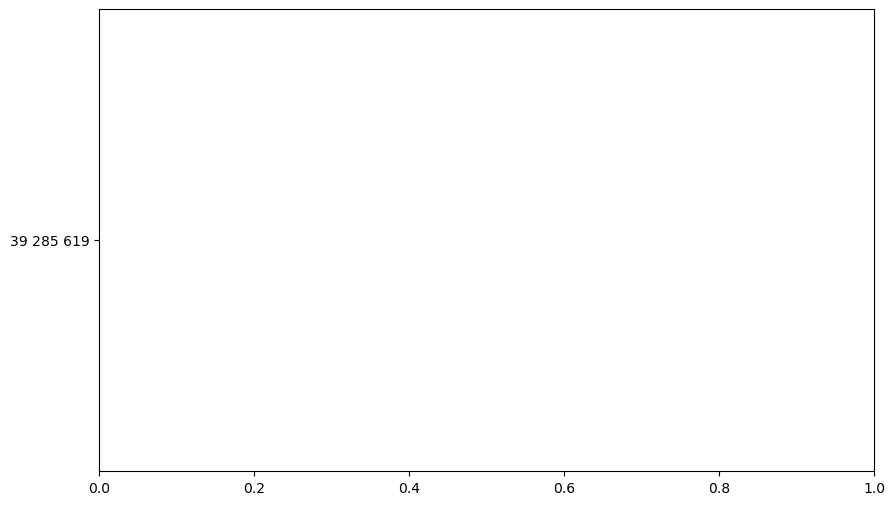

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(result_table_distrib['Год'], result_table_distrib['Номинальная выручка, тыс руб.'], 
         color='black', linewidth=2, marker='o', label='Номинальная')
plt.plot(result_table_distrib['Год'], result_table_distrib['Реальная выручка, тыс руб.'], 
         color='red', linewidth=2, marker='s', label='Реальная')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(result_table_distrib['Год'].astype(int))
plt.yticks(plt.yticks()[0][1:-1])

plt.legend(loc='upper left', framealpha=0)

plt.tight_layout()
plt.savefig(r"C:\Users\Qawse\Desktop\Кайрос\Предложение\distrib_revenue_dynamics.png", 
            dpi=300, bbox_inches='tight')
plt.show()

In [56]:
df_2024_distrib = unified_distrib_df[unified_distrib_df['Год'] == 2024].copy()

total_revenue_distrib = df_2024_distrib['Выручка, RUB'].sum()
top10_distrib = df_2024_distrib.nlargest(10, 'Выручка, RUB')[['Наименование', 'Выручка, RUB']]
top10_distrib['Доля в выручке, %'] = (top10_distrib['Выручка, RUB'] / total_revenue_distrib * 100).round(2)
top10_distrib['Выручка, тыс. руб.'] = (top10_distrib['Выручка, RUB'] / 1000).round(0).astype(int)
top10_distrib = top10_distrib[['Наименование', 'Выручка, тыс. руб.', 'Доля в выручке, %']]

# Добавляем строку "Итого"
total_row = pd.DataFrame({
    'Наименование': ['Итого'],
    'Выручка, тыс. руб.': [top10_distrib['Выручка, тыс. руб.'].sum()],
    'Доля в выручке, %': [top10_distrib['Доля в выручке, %'].sum()]
})

top10_distrib_with_total = pd.concat([top10_distrib, total_row], ignore_index=True)

# Форматируем числа с разделителями разрядов
top10_distrib_with_total['Выручка, тыс. руб.'] = top10_distrib_with_total['Выручка, тыс. руб.'].apply(lambda x: f"{x:,}".replace(",", " "))

print("ТОП-10 ДИСТРИБЬЮТОРОВ ПО ВЫРУЧКЕ")
display(top10_distrib_with_total)

print(f"\nСуммарная доля ТОП-10: {top10_distrib['Доля в выручке, %'].sum():.1f}%")

hhi_distrib = ((df_2024_distrib['Выручка, RUB'] / total_revenue_distrib * 100) ** 2).sum()
print(f"\nИНДЕКС ХЕРФИНДАЛЯ-ХИРШМАНА (HHI): {hhi_distrib:.0f}")

correlation_distrib = df_2024_distrib['Выручка, RUB'].corr(df_2024_distrib['Активы  всего, RUB:'])
print(f"КОРРЕЛЯЦИЯ выручка vs активы: {correlation_distrib:.3f}")

ТОП-10 ДИСТРИБЬЮТОРОВ ПО ВЫРУЧКЕ


,Наименование,"Выручка, тыс. руб.","Доля в выручке, %"
0,"КОМПЛЕКТ АЙС, ООО",4 156 557,9.13
1,"СПС-ХОЛОД, ООО",3 832 030,8.41
2,"ДАНТЕКС РУС, ООО",3 510 530,7.71
3,"ЭТП ГПБ, ООО",3 210 705,7.05
4,"ИНГЕНИУМ, ООО",2 889 734,6.34
5,"СИНЕТИК, АО",2 575 149,5.65
6,"ТЕХНОФРОСТ, ООО",2 334 309,5.12
7,"ПОЛАИР-ИМПЕКС, ООО",1 990 766,4.37
8,"МАШИМПЭКС, ООО",1 933 972,4.25
9,"МАРКОН-ХОЛОД, АО",1 803 790,3.96



Суммарная доля ТОП-10: 62.0%

ИНДЕКС ХЕРФИНДАЛЯ-ХИРШМАНА (HHI): 491
КОРРЕЛЯЦИЯ выручка vs активы: 0.572


In [57]:
df_2024_producers = df_clean[df_clean['Год'] == 2024].copy()

total_revenue_producers = df_2024_producers['Выручка, RUB'].sum()
top10_producers = df_2024_producers.nlargest(10, 'Выручка, RUB')[['Наименование', 'Выручка, RUB']]
top10_producers['Доля в выручке, %'] = (top10_producers['Выручка, RUB'] / total_revenue_producers * 100).round(2)
top10_producers['Выручка, тыс. руб.'] = (top10_producers['Выручка, RUB'] / 1000).round(0).astype(int)
top10_producers = top10_producers[['Наименование', 'Выручка, тыс. руб.', 'Доля в выручке, %']]

# Добавляем строку "Итого"
total_row = pd.DataFrame({
    'Наименование': ['Итого'],
    'Выручка, тыс. руб.': [top10_producers['Выручка, тыс. руб.'].sum()],
    'Доля в выручке, %': [top10_producers['Доля в выручке, %'].sum()]
})

top10_producers_with_total = pd.concat([top10_producers, total_row], ignore_index=True)

# Форматируем числа с разделителями разрядов
top10_producers_with_total['Выручка, тыс. руб.'] = top10_producers_with_total['Выручка, тыс. руб.'].apply(lambda x: f"{x:,}".replace(",", " "))

print("ТОП-10 ПРОИЗВОДИТЕЛЕЙ ПО ВЫРУЧКЕ")
display(top10_producers_with_total)

print(f"\nСуммарная доля ТОП-10: {top10_producers['Доля в выручке, %'].sum():.1f}%")

hhi_producers = ((df_2024_producers['Выручка, RUB'] / total_revenue_producers * 100) ** 2).sum()
print(f"\nИНДЕКС ХЕРФИНДАЛЯ-ХИРШМАНА (HHI): {hhi_producers:.0f}")

correlation_producers = df_2024_producers['Выручка, RUB'].corr(df_2024_producers['Активы  всего, RUB:'])
print(f"КОРРЕЛЯЦИЯ выручка vs активы: {correlation_producers:.3f}")

ТОП-10 ПРОИЗВОДИТЕЛЕЙ ПО ВЫРУЧКЕ


,Наименование,"Выручка, тыс. руб.","Доля в выручке, %"
0,"КОРФ, ООО",8 919 853,16.91
1,"БОРМАШ, ООО",6 867 081,13.02
2,"ТЕПЛОХИМ, АО",3 138 689,5.95
3,"ДАЛГАКЫРАН-М, АО",2 958 141,5.61
4,"ЭКОПРОМРЕСУРС, ООО",1 990 475,3.77
5,"ЗАВОД БОРМАШ, ООО",1 880 853,3.57
6,"ДАНТЕКС КЛИМАТ, ООО",1 833 113,3.48
7,"ПП ТЕХВЕНТ, ООО",1 720 272,3.26
8,"СПЛИТЕКС, ООО",1 677 771,3.18
9,"НОРМАЛ-ВЕНТ, ООО",1 600 944,3.04



Суммарная доля ТОП-10: 61.8%

ИНДЕКС ХЕРФИНДАЛЯ-ХИРШМАНА (HHI): 643
КОРРЕЛЯЦИЯ выручка vs активы: 0.715


In [55]:
import pandas as pd
from IPython.display import display

trade = pd.read_excel(r"C:\Users\Qawse\Desktop\Кайрос\Предложение\Импорт\IMPORT-EXPORT.xlsx")

trade['cmdCode'] = trade['cmdCode'].astype(int)
names = {
    841430: 'Компрессоры, используемые в холодильном оборудовании',
    841950: 'Теплообменники',
    841582: ' Установки для кондиц.воздуха, оборуд вент.с двигателем и приборами для изменен.температ.и влажности воздуха, включая кондиц.,в которых влажн. не регулир.отдельно, с холод.установкой',
    841459: 'Прочие вентиляторы',
    731100: 'Емкости для сжатого или сжиженного газа, из черных металлов',
    842139: 'Прочее оборудование для фильтрования или очистки газов',
    842129: 'Прочее оборудование для фильтрования или очистки жидкостей',
    841869: 'Прочее оборудование холодильное и морозильное, тепловые насосы',
    841899: 'Прочие части холодильников, морозильников и прочего оборудования'
}
trade['cmdDesc'] = trade['cmdCode'].map(names)

df_import = trade[trade['flowDesc'] == 'Export'].copy()
df_export = trade[trade['flowDesc'] == 'Import'].copy()
df_import = df_import.drop('flowDesc', axis=1)
df_export = df_export.drop('flowDesc', axis=1)

production_value = df_2024['Выручка, RUB'].sum()

usd_rate = 92.5895

import_usd = df_import[df_import['refYear'] == 2024]['fobvalue'].fillna(df_export['cifvalue']).sum()
import_rub = import_usd * usd_rate

export_usd = df_export[df_export['refYear'] == 2024]['cifvalue'].fillna(df_export['fobvalue']).sum()
export_rub = export_usd * usd_rate

market_size = production_value + import_rub - export_rub

print(f"Производство в РФ: {production_value:,.0f} RUB")
print(f"Импорт: {import_rub:,.0f} RUB ({import_usd:,.0f} USD)")
print(f"Экспорт: {export_rub:,.0f} RUB ({export_usd:,.0f} USD)")
print(f"Предложение на Российском рынке: {market_size:,.0f} RUB")
print(f"Предложение всего: {market_size+export_rub:,.0f} RUB")

Производство в РФ: 52,740,496,000 RUB
Импорт: 251,213,230,106 RUB (2,713,193,506 USD)
Экспорт: 42,912,852,304 RUB (463,474,285 USD)
Предложение на Российском рынке: 261,040,873,802 RUB
Предложение всего: 303,953,726,106 RUB


In [26]:
plt.figure(figsize=(12, 8))

producers = combined_df[combined_df['Тип компании'] == 'Производитель']
distributors = combined_df[combined_df['Тип компании'] == 'Дистрибьютор']

plt.scatter(producers['Выручка, RUB'] / 1000, producers['Рентабельность продаж, %'] * 100, 
            alpha=0.6, color='red', label='Производители', s=60)
plt.scatter(distributors['Выручка, RUB'] / 1000, distributors['Рентабельность продаж, %'] * 100, 
            alpha=0.6, color='black', label='Дистрибьюторы', s=60)

plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.axvline(x=(combined_df['Выручка, RUB'] / 1000).median(), color='gray', linestyle='-', alpha=0.3)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.grid(True, alpha=0.3, linestyle='--')

plt.xlabel('Выручка, тыс. руб.')
plt.ylabel('Рентабельность продаж, %')

plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.legend(framealpha=0.7)

plt.tight_layout()
plt.savefig(r"C:\Users\Qawse\Desktop\Кайрос\Предложение\scatter_market_segments.png", 
            dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'combined_df' is not defined

<Figure size 1200x800 with 0 Axes>

In [27]:
from scipy import stats

def analyze_liquidity_comparison(df, company_type):
    df_2024 = df[df['Год'] == 2024].copy()
    top10 = df_2024.nlargest(5, 'Выручка, RUB')
    others = df_2024[~df_2024.index.isin(top10.index)]
    
    top10_liquidity = top10['Коэффициент текущей ликвидности, %'].mean()
    others_liquidity = others['Коэффициент текущей ликвидности, %'].mean()
    
    t_stat, p_value = stats.ttest_ind(top10['Коэффициент текущей ликвидности, %'], 
                                     others['Коэффициент текущей ликвидности, %'], 
                                     nan_policy='omit')
    
    print(f"{company_type}:")
    print(f"ТОП-10 компаний: {top10_liquidity:.2f}%")
    print(f"Остальные компании: {others_liquidity:.2f}%")
    print(f"p-value: {p_value:.4f}")
    print(f"Разница статистически {'значима' if p_value < 0.05 else 'не значима'}\n")

def analyze_capital_intensity(df, company_type):
    df_2024 = df[df['Год'] == 2024].copy()
    df_2024['Капиталоёмкость'] = df_2024['Активы  всего, RUB:'] / df_2024['Выручка, RUB']
    
    top10 = df_2024.nlargest(5, 'Выручка, RUB')
    others = df_2024[~df_2024.index.isin(top10.index)]
    
    top10_capital = top10['Капиталоёмкость'].mean()
    others_capital = others['Капиталоёмкость'].mean()
    
    t_stat, p_value = stats.ttest_ind(top10['Капиталоёмкость'], 
                                     others['Капиталоёмкость'], 
                                     nan_policy='omit')
    
    print(f"{company_type}:")
    print(f"ТОП-10 компаний: {top10_capital:.2f}")
    print(f"Остальные компании: {others_capital:.2f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Разница статистически {'значима' if p_value < 0.05 else 'не значима'}\n")

print("СРАВНЕНИЕ КОЭФФИЦИЕНТОВ ЛИКВИДНОСТИ")
analyze_liquidity_comparison(df_clean, 'Производители')
analyze_liquidity_comparison(unified_distrib_df, 'Дистрибьюторы')

combined_all = pd.concat([df_clean, unified_distrib_df], ignore_index=True)
analyze_liquidity_comparison(combined_all, 'Объединенный датасет')

print("\nСРАВНЕНИЕ КАПИТАЛОЁМКОСТИ")
analyze_capital_intensity(df_clean, 'Производители')
analyze_capital_intensity(unified_distrib_df, 'Дистрибьюторы')
analyze_capital_intensity(combined_all, 'Объединенный датасет')

СРАВНЕНИЕ КОЭФФИЦИЕНТОВ ЛИКВИДНОСТИ
Производители:
ТОП-10 компаний: 1.28%
Остальные компании: 4.35%
p-value: 0.4192
Разница статистически не значима

Дистрибьюторы:
ТОП-10 компаний: 3.32%
Остальные компании: 9.78%
p-value: 0.7431
Разница статистически не значима

Объединенный датасет:
ТОП-10 компаний: 3.30%
Остальные компании: 6.11%
p-value: 0.8125
Разница статистически не значима


СРАВНЕНИЕ КАПИТАЛОЁМКОСТИ
Производители:
ТОП-10 компаний: 0.53
Остальные компании: 1.02
p-value: 0.2987
Разница статистически не значима

Дистрибьюторы:
ТОП-10 компаний: 1.41
Остальные компании: 5.73
p-value: 0.6619
Разница статистически не значима

Объединенный датасет:
ТОП-10 компаний: 0.61
Остальные компании: 2.65
p-value: 0.7236
Разница статистически не значима



In [28]:
def analyze_metrics_comparison(df, company_type):
    df_2024 = df[df['Год'] == 2024].copy()
    top10 = df_2024.nlargest(5, 'Выручка, RUB')
    others = df_2024[~df_2024.index.isin(top10.index)]
    
    metrics = {
        'Рентабельность продаж, %': 'Рентабельность продаж',
        'Рентабельность активов (ROA), %': 'ROA',
        'Среднесписочная численность работников': 'Численность',
        'Производительность труда': 'Производительность'
    }
    
    print(f"{company_type}:")
    
    for col, name in metrics.items():
        if col in df_2024.columns:
            if col == 'Производительность труда':
                top10_mean = (top10['Выручка, RUB'] / top10['Среднесписочная численность работников']).mean()
                others_mean = (others['Выручка, RUB'] / others['Среднесписочная численность работников']).mean()
                top10_vals = top10['Выручка, RUB'] / top10['Среднесписочная численность работников']
                others_vals = others['Выручка, RUB'] / others['Среднесписочная численность работников']
            else:
                top10_mean = top10[col].mean()
                others_mean = others[col].mean()
                top10_vals = top10[col]
                others_vals = others[col]
            
            t_stat, p_value = stats.ttest_ind(top10_vals, others_vals, nan_policy='omit')
            
            print(f"{name}: ТОП-10 {top10_mean:.2f} vs остальные {others_mean:.2f} (p={p_value:.4f})")

print("СРАВНЕНИЕ ПОКАЗАТЕЛЕЙ ТОП-10 VS ОСТАЛЬНЫЕ")
print("=" * 60)
analyze_metrics_comparison(df_clean, 'Производители')
print()
analyze_metrics_comparison(unified_distrib_df, 'Дистрибьюторы')

СРАВНЕНИЕ ПОКАЗАТЕЛЕЙ ТОП-10 VS ОСТАЛЬНЫЕ
Производители:
Рентабельность продаж: ТОП-10 0.13 vs остальные 0.08 (p=0.4740)
ROA: ТОП-10 0.14 vs остальные 0.14 (p=0.9846)
Численность: ТОП-10 219.80 vs остальные 31.53 (p=0.0000)

Дистрибьюторы:
Рентабельность продаж: ТОП-10 0.11 vs остальные 0.08 (p=0.7423)
ROA: ТОП-10 0.17 vs остальные 0.13 (p=0.6721)
Численность: ТОП-10 191.60 vs остальные 49.63 (p=0.0001)


In [29]:
producers_stats['Год'] = producers_stats['Год'].astype(str)
distrib_stats['Год'] = distrib_stats['Год'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(producers_stats['Год'], producers_stats['Средняя выручка'] / 1000, 
         color='black', linewidth=3, marker='o', label='Средняя (номинал)')
plt.plot(producers_stats['Год'], producers_stats['Медианная выручка'] / 1000, 
         color='black', linewidth=2, marker='s', linestyle='--', alpha=0.7, label='Медианная (номинал)')
plt.plot(producers_stats['Год'], producers_stats['Средняя выручка (реальная)'] / 1000, 
         color='red', linewidth=3, marker='o', label='Средняя (реальная)')
plt.plot(producers_stats['Год'], producers_stats['Медианная выручка (реальная)'] / 1000, 
         color='red', linewidth=2, marker='s', linestyle='--', alpha=0.7, label='Медианная (реальная)')

plt.xlabel('Год')
plt.ylabel('Выручка, тыс. руб.')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

NameError: name 'producers_stats' is not defined

In [30]:

plt.figure(figsize=(10, 6))
plt.plot(distrib_stats['Год'], distrib_stats['Средняя выручка'] / 1000, 
         color='black', linewidth=3, marker='o', label='Средняя (номинал)')
plt.plot(distrib_stats['Год'], distrib_stats['Медианная выручка'] / 1000, 
         color='black', linewidth=2, marker='s', linestyle='--', alpha=0.7, label='Медианная (номинал)')
plt.plot(distrib_stats['Год'], distrib_stats['Средняя выручка (реальная)'] / 1000, 
         color='red', linewidth=3, marker='o', label='Средняя (реальная)')
plt.plot(distrib_stats['Год'], distrib_stats['Медианная выручка (реальная)'] / 1000, 
         color='red', linewidth=2, marker='s', linestyle='--', alpha=0.7, label='Медианная (реальная)')

plt.xlabel('Год')
plt.ylabel('Выручка, тыс. руб.')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


NameError: name 'distrib_stats' is not defined

<Figure size 1000x600 with 0 Axes>

In [31]:

years_str = [str(year) for year in range(2020, 2025)]

plt.figure(figsize=(10, 6))
plt.plot(years_str, producers_hhi, color='blue', linewidth=2, marker='o', label='Производители')
plt.plot(years_str, distrib_hhi, color='green', linewidth=2, marker='s', label='Дистрибьюторы')

plt.xlabel('Год')
plt.ylabel('Индекс HHI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

NameError: name 'producers_hhi' is not defined

<Figure size 1000x600 with 0 Axes>

In [32]:
p2024['Коэффициент автономии, %'] = (p2024['2024, Капитал и резервы, RUB'] / 
                            p2024['2024, Пассивы всего, RUB']) * 100

p2024['Коэффициент финансового левериджа, %'] = (p2024['2024, Совокупный долг, RUB'] / 
                          (p2024['2024, Совокупный долг, RUB'] + p2024['2024, Капитал и резервы, RUB'])) * 100

cols_for_analysis = [
    '2024, Капитал и резервы, RUB',
    '2024, Совокупный долг, RUB', 
    '2024, Пассивы всего, RUB',
    '2024, Коэффициент соотношения заемных и собственных средств, %',
    '2024, Коэффициент покрытия процентов по EBIT, %',
    '2024, Проценты к уплате, RUB',
    '2024, EBIT, RUB',
    'Коэффициент автономии, %',
    'Коэффициент финансового левериджа, %'
]

def format_financials(df):
    result = df.copy()
    
    rub_columns = [col for col in df.columns if 'RUB' in col and '%' not in col]
    for col in rub_columns:
        result[col] = df[col] / 1000000
    
    pct_columns = [col for col in df.columns if '%' in col]
    for col in pct_columns:
        result[col] = df[col].round(1)
    
    return result

df_formatted = format_financials(p2024[cols_for_analysis])

rename_dict = {
    '2024, Капитал и резервы, RUB': 'Собственный капитал, млн руб.',
    '2024, Совокупный долг, RUB': 'Совокупный долг, млн руб.',
    '2024, Пассивы всего, RUB': 'Всего активов, млн руб.',
    '2024, Коэффициент соотношения заемных и собственных средств, %': 'Заемные/Собственные, %',
    '2024, Коэффициент покрытия процентов по EBIT, %': 'Покрытие процентов, %',
    '2024, Проценты к уплате, RUB': 'Проценты к уплате, млн руб.',
    '2024, EBIT, RUB': 'EBIT, млн руб.'
}

df_formatted = df_formatted.rename(columns=rename_dict)

desc_stats = df_formatted.describe()

russian_names = {
    'count': 'Количество',
    'mean': 'Среднее',
    'std': 'Стандартное отклонение',
    'min': 'Минимум',
    '25%': '25-й процентиль',
    '50%': 'Медиана',
    '75%': '75-й процентиль',
    'max': 'Максимум'
}

desc_stats_ru = desc_stats.rename(index=russian_names)

desc_stats_ru.round(1)

,"Собственный капитал, млн руб.","Совокупный долг, млн руб.","Всего активов, млн руб.","Заемные/Собственные, %","Покрытие процентов, %","Проценты к уплате, млн руб.","EBIT, млн руб.","Коэффициент автономии, %","Коэффициент финансового левериджа, %"
Количество,81.0,81.0,82.0,80.0,24.0,24.0,82.0,81.0,80.0
Среднее,161.0,396.9,551.1,9.0,10.9,10.3,65.4,35.0,65.8
Стандартное отклонение,399.9,786.2,1073.0,19.5,18.4,22.4,139.5,29.1,28.3
Минимум,-21.8,0.4,2.9,-12.2,-7.9,0.0,-10.0,-8.9,2.5
25-й процентиль,6.4,19.3,36.6,0.9,1.0,0.9,1.6,10.1,47.6
Медиана,24.2,84.3,129.6,2.1,2.4,2.0,12.7,30.9,69.8
75-й процентиль,99.0,420.3,566.1,8.7,9.3,3.6,40.2,52.5,90.3
Максимум,3084.8,4749.7,5878.4,146.4,60.9,86.8,794.1,100.0,108.9


In [ ]:
unified_df.to_csv('unified_refrigeration_companies.csv', index=False, encoding='utf-8-sig')